# Clustering Validation
#### Created by Andres Segura
#### Created on Apr 17, 2021

In [1]:
# Import libraries
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [2]:
# Plot libraries
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from yellowbrick.cluster import SilhouetteVisualizer

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


## 1. Load Iris data

In [3]:
# Load the IRIS dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

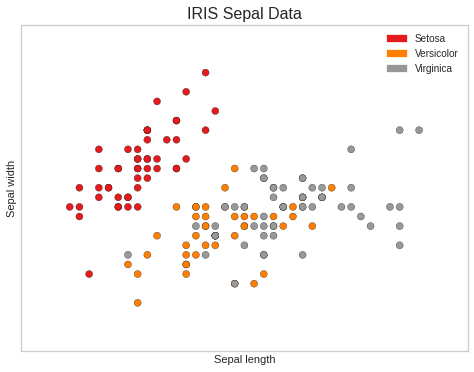

In [4]:
# Plot the training points
fig, ax = plt.subplots(figsize = (8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title("IRIS Sepal Data", fontsize=16)
op1 = mpatches.Patch(color='#E41A1C', label='Setosa')
op2 = mpatches.Patch(color='#FF8000', label='Versicolor')
op3 = mpatches.Patch(color='#979797', label='Virginica')
plt.legend(handles=[op1, op2, op3], loc='best')
plt.show()

## 2. Select Optimal Number of Clusters

In [5]:
kmax = 9
sse = []
sil = []

for k in range(1, kmax+1):
  # Create K-Means
  kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=42)
  kmeans = kmeans.fit(X)

  centroids = kmeans.cluster_centers_
  pred_clusters = kmeans.predict(X)
  
  # Calculate square of Euclidean distance of each point from its cluster center and add to current WSS
  curr_sse = 0
  for i in range(len(X)):
    curr_center = centroids[pred_clusters[i]]
    curr_sse += (X[i, 0] - curr_center[0]) ** 2 + (X[i, 1] - curr_center[1]) ** 2
  sse.append(curr_sse)

  # Dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
  labels = kmeans.labels_
  if k > 1:
    sil.append(silhouette_score(X, labels, metric='euclidean'))
  else:
    sil.append(0)

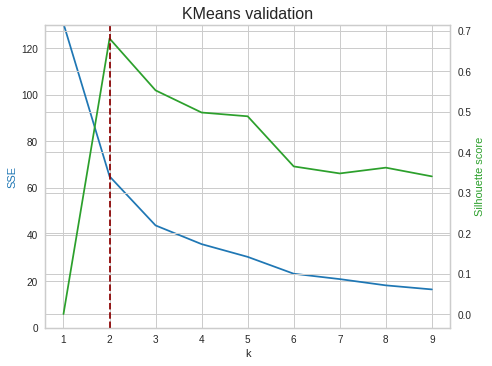

In [6]:
fig, ax1 = plt.subplots(figsize=(7, 5))
t = list(range(1, kmax+1))

# Axix 1
color = 'tab:blue'
ax1.set_ylabel('SSE', color=color)
ax1.set_xlabel("k")
ax1.plot(t, sse, color=color, label="Elbow method")
ax1.set_ylim([0, 130])

# Axix 2
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Silhouette score', color=color)
ax2.plot(t, sil, color=color, label="Silhouette analysis")

plt.axvline(x=2, color = "#8b0000", linestyle = "--")
fig.tight_layout()
plt.title("KMeans validation", fontsize=16)
plt.show()

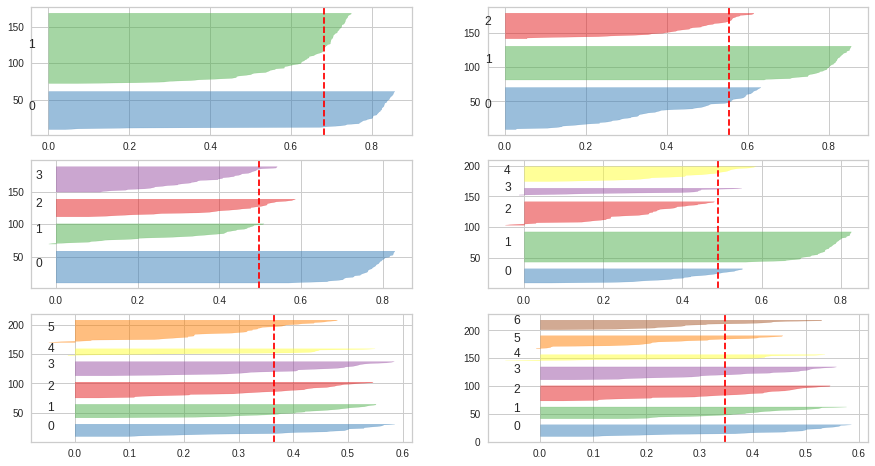

In [7]:
fig, ax = plt.subplots(3, 2, figsize=(15,8))
for k in range(2, kmax-1):
    # Create KMeans instance for different number of clusters
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(k, 2)
    
    # Create SilhouetteVisualizer instance with KMeans instance
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X) 

## 3. Apply K-Means Clustering

In [8]:
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, max_iter=100, random_state=42)
kmeans = kmeans.fit(X)
labels = kmeans.labels_

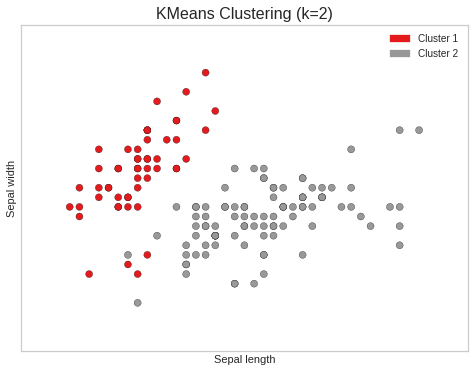

In [9]:
# Plot clustered data
fig, ax = plt.subplots(figsize = (8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap=plt.cm.Set1, edgecolor='k')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title("KMeans Clustering (k=2)", fontsize=16)
op1 = mpatches.Patch(color='#E41A1C', label='Cluster 1')
op2 = mpatches.Patch(color='#979797', label='Cluster 2')
plt.legend(handles=[op1, op2], loc='best')
plt.show()